<a href="https://colab.research.google.com/github/Shourya306/EDA-Analaysis/blob/main/Copy_of_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [ ]:
# Importing all the relevent libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [ ]:
pd.set_option('display.max_columns', None)     # This code is used to make pandas display all the columns in the dateset.

In [ ]:
# Mounting the drive.
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Reading in the dataset.
file_path = '/content/drive/MyDrive/Colab Notebooks/Module 1/M1 - Capstone Project/Copy of Global Terrorism Data.csv'
# Encoded with "latin-1" because the default encoding wasn't able to encode the large file. 
full_df = pd.read_csv(file_path, encoding = 'latin-1', low_memory = False)  

I have divided the **EDA** into 2 parts:
  
  * Part 1 = **Data Cleaning**

              1. Features Selection.
              2. Dealing with null values.
  * Part 2 = **Data Analysis**

              1. Preliminary Analysis.
              2. Comparison of India and Iraq Terrorism.



# So let's begin with **Data Cleaning**.

In [ ]:
full_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [ ]:
full_df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,182.0,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Al-Shabaab,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,1.0,10.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,5.0,Unknown Gun Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,167.0,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Muslim extremists,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,11.0,"Projectile (rockets, mortars, RPGs, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,4.0,Unknown,-99.0,Seven military planes were damaged in this att...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,160.0,Philippines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bangsamoro Islamic Freedom Movement (BIFM),NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0

In [ ]:
full_df.shape

(181691, 135)

In [ ]:
# Finding out the percentage of null values in an example column.
null_values_weaptype2_txt = full_df[full_df['weaptype2_txt'].isnull()]
Percentage_null_values_weaptype2_txt = (len(null_values_weaptype2_txt['weaptype2_txt']) / len(full_df['weaptype2_txt'])) * 100
null_percent = round(Percentage_null_values_weaptype2_txt,2)
print(f'weaptype2_txt column has a null percentage of {null_percent}')

weaptype2_txt column has a null percentage of 92.78


## Features Selection

* There are **135 columns** in the dataset and it dosen't make sense to analyse all the features of the dataset because:

    1.Most of the features/columns in the dataset contain the same 
    information as the other columns (e.g weaptype1_txt & weaptype2_txt).

    2.And also these columns(not relevent columns) contain a lot of 
    null information (e.g weaptype2_txt contains 93% percent null values).

* So I will subset the above dateset with only those columns that
satisfy the above 2 conditions.

In [ ]:
# Subsetting the dataset.
subset_df = full_df[['iyear','imonth','iday','extended','country_txt','region_txt','city','latitude','longitude','success','suicide','attacktype1_txt',
                'targtype1_txt','gname','motive','weaptype1_txt','nkill','nwound']]

In [ ]:
subset_df.shape

(181691, 18)

In [ ]:
# Making a copy of the subseted dataframe and working only on the copy of the subseted dataframe.
df = subset_df.copy()

In [ ]:
# Now it's time to rename the columns to make it more intuitive as to what the columns represent.
df.rename(columns = {'iyear':'year','imonth':'month','iday':'day','country_txt':'country','region_txt':'region','attacktype1_txt':'attack_type',
                            'targtype1_txt':'target','gname':'organisation','weaptype1_txt':'weapon_type','nkill':'killed','nwound':'wounded'},
                 inplace = True)

In [ ]:
df.info()   #This is used to check the data type of the columns before performing any operations on them.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          181691 non-null  int64  
 1   month         181691 non-null  int64  
 2   day           181691 non-null  int64  
 3   extended      181691 non-null  int64  
 4   country       181691 non-null  object 
 5   region        181691 non-null  object 
 6   city          181257 non-null  object 
 7   latitude      177135 non-null  float64
 8   longitude     177134 non-null  float64
 9   success       181691 non-null  int64  
 10  suicide       181691 non-null  int64  
 11  attack_type   181691 non-null  object 
 12  target        181691 non-null  object 
 13  organisation  181691 non-null  object 
 14  motive        50561 non-null   object 
 15  weapon_type   181691 non-null  object 
 16  killed        171378 non-null  float64
 17  wounded       165380 non-null  float64
dtypes: f

In [ ]:
df.head()

,year,month,day,extended,country,region,city,latitude,longitude,success,suicide,attack_type,target,organisation,motive,weapon_type,killed,wounded
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,1,0,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0
1,1970,0,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,1,0,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0
3,1970,1,0,0,Greece,Western Europe,Athens,37.997490,23.762728,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN
4,1970,1,0,0,Japan,East Asia,Fukouka,33.580412,130.396361,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN


In [ ]:
df.tail()

,year,month,day,extended,country,region,city,latitude,longitude,success,suicide,attack_type,target,organisation,motive,weapon_type,killed,wounded
181686,2017,12,31,0,Somalia,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,1,0,Armed Assault,Military,Al-Shabaab,NaN,Firearms,1.0,2.0
181687,2017,12,31,0,Syria,Middle East & North Africa,Jableh,35.407278,35.942679,1,0,Bombing/Explosion,Military,Muslim extremists,NaN,Explosives,2.0,7.0
181688,2017,12,31,0,Philippines,Southeast Asia,Kubentog,6.900742,124.437908,1,0,Facility/Infrastructure Attack,Private Citizens & Property,Bangsamoro Islamic Freedom Movement (BIFM),NaN,Incendiary,0.0,0.0
181689,2017,12,31,0,India,South Asia,Imphal,24.798346,93.940430,0,0,Bombing/Explosion,Government (General),Unknown,NaN,Explosives,0.0,0.0
181690,2017,12,31,0,Philippines,Southeast Asia,Cotabato City,7.209594,124.241966,0,0,Bombing/Explosion,Unknown,Unknown,NaN,Explosives,0.0,0.0


In [ ]:
# This will provide the summary stats for the numeric variables.
df.describe()

,year,month,day,extended,latitude,longitude,success,suicide,killed,wounded
count,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,0.045346,23.498343,-4.586957e+02,0.889598,0.036507,2.403272,3.167668
std,13.259430,3.388303,8.814045,0.208063,18.569242,2.047790e+05,0.313391,0.187549,11.545741,35.949392
min,1970.000000,0.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,11.510046,4.545640e+00,1.000000,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,31.467463,4.324651e+01,1.000000,0.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,0.000000,34.685087,6.871033e+01,1.000000,0.000000,2.000000,2.000000
max,2017.000000,12.000000,31.000000,1.000000,74.633553,1.793667e+02,1.000000,1.000000,1570.000000,8191.000000


Before we proceed any further lets understand what each of the columns means.
  * year = The year in which attack has taken place.
  * month = The month(represented in numbers) in which the attack has taken   place.
  * day = The day in which the attack has taken place.
  * extended = If the attack has extended for more than one day then value 1 is assigned and if it isn't then value 0 is assigned.
  * country = The country in which the incident took place.
  * city = The city in which the incident took place.
  * latitude = This field represents the latitude.
  * longitude = This field represents the longitude.
  * success = This field informs us whether the attack was a success or a failure(0 = failure, 1 = Success).
  * suicide = This field informs us whether the attack was carried out as a  suicide mission or not
  (0 = not a suicide mission, 1. = suicide mission)
  * attack_type = The type of attack.
  * target = The type of target/victim.
  * organisation = Terrorist Organisation that has claimed the attack.
  * motive = The motive behind the attack.
  * weapon_type = The type of weapon used in the attack.
  * killed = The number of people killed in that attack.
  * wounded = The number of people wounded in that attack.

In [ ]:
# I will be dropping the latitude and longitude columns because I won't be needing them.
df.drop(['latitude','longitude'],axis = 1,inplace = True)

In [ ]:
# Checking if the columns have been dropped or not.
df.shape

(181691, 16)

##Now lets deal with **null values**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          181691 non-null  int64  
 1   month         181691 non-null  int64  
 2   day           181691 non-null  int64  
 3   extended      181691 non-null  int64  
 4   country       181691 non-null  object 
 5   region        181691 non-null  object 
 6   city          181257 non-null  object 
 7   success       181691 non-null  int64  
 8   suicide       181691 non-null  int64  
 9   attack_type   181691 non-null  object 
 10  target        181691 non-null  object 
 11  organisation  181691 non-null  object 
 12  motive        50561 non-null   object 
 13  weapon_type   181691 non-null  object 
 14  killed        171378 non-null  float64
 15  wounded       165380 non-null  float64
dtypes: float64(2), int64(6), object(8)
memory usage: 22.2+ MB


**Approach used for dealing with null values -** There are 4 columns which have null values viz. **motive**,**killed**,**wounded**,**city**.

I won't be using dropna method because most of my data will be lost if i remove all the rows that contain null values because of the **motive** column(only 28 percent of the data will remain).





In [ ]:
df['motive'].value_counts()

Unknown                                                                                                                                                                                                                                                                                                                                                                  14889
The specific motive for the attack is unknown.                                                                                                                                                                                                                                                                                                                           14430
The specific motive is unknown; however, sources noted that the attack may have been part of a larger trend of violence related to Bangladesh's nationwide hartal, which began on January 6, 2015.                                                                        

In [ ]:
df['city'].value_counts()

Unknown      9775
Baghdad      7589
Karachi      2652
Lima         2359
Mosul        2265
             ... 
Hotwag          1
Ostend          1
Balughata       1
Jikoyi          1
Kubentog        1
Name: city, Length: 36674, dtype: int64

**Approach used for dealing with null values for categorical variables:**

Using the value_counts() method I have got an understanding of the value that is being used if the data is not present. String ‘unknown’ is being used. So I will replaced all the null values with string ‘unknown’.


In [ ]:
# Replacing the null values in motive and city column.
df['motive'].fillna('Unknown',inplace = True)
df['city'].fillna('Unknown',inplace = True)

In [ ]:
# Checking if there are any null values in motive and city column
df[df['motive'].isnull()]['motive'].count()

0

In [ ]:
df[df['city'].isnull()]['city'].count()

0

**Approach for continuous variables:**

Dealing with null values which are present in the **killed** and **wounded** columns.

I have chosen mean over median to replace the null values with, because there are only a few outliers in these columns which, you will get to see in the **Box Plot** below.  

In [ ]:
# Replacing the null values of killed with their mean values grouped by countries.
df['filled_killed'] = df.groupby('country')['killed'].apply(lambda x: x.fillna(x.mean()))
df.head()

,year,month,day,extended,country,region,city,success,suicide,attack_type,target,organisation,motive,weapon_type,killed,wounded,filled_killed
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,Assassination,Private Citizens & Property,MANO-D,Unknown,Unknown,1.0,0.0,1.000000
1,1970,0,0,0,Mexico,North America,Mexico city,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,Unknown,0.0,0.0,0.000000
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,1,0,Assassination,Journalists & Media,Unknown,Unknown,Unknown,1.0,0.0,1.000000
3,1970,1,0,0,Greece,Western Europe,Athens,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,Unknown,Explosives,NaN,NaN,0.257324
4,1970,1,0,0,Japan,East Asia,Fukouka,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Unknown,Incendiary,NaN,NaN,0.176944


In [ ]:
df[df['country'] == 'India'].head()

,year,month,day,extended,country,region,city,success,suicide,attack_type,target,organisation,motive,weapon_type,killed,wounded,filled_killed
1186,1972,2,22,0,India,South Asia,New Delhi,1,0,Hijacking,Airports & Aircraft,Palestinians,Unknown,Explosives,0.0,0.0,0.000000
2764,1975,1,2,0,India,South Asia,Samastipur,1,0,Bombing/Explosion,Government (General),Ananda Marga,Unknown,Explosives,4.0,0.0,4.000000
3857,1976,5,26,0,India,South Asia,New Delhi,1,0,Bombing/Explosion,Airports & Aircraft,Unknown,Unknown,Explosives,0.0,0.0,0.000000
5327,1977,9,28,0,India,South Asia,Bombay,1,0,Hijacking,Airports & Aircraft,Japanese Red Army (JRA),Unknown,Firearms,0.0,0.0,0.000000
7337,1979,1,13,0,India,South Asia,Unknown,1,0,Armed Assault,Police,Naga People,Unknown,Firearms,NaN,NaN,1.647445


The null values have been replaced according to their respective country means.
In this case the null values of killed have been replaced by the mean of killings for the country india(Check only the part that is true).

In [ ]:
df.groupby(df['country'] == 'India')['killed'].describe()
                                                                

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
False,159638.0,2.458857,11.893314,0.0,0.0,0.0,2.0,1570.0
True,11740.0,1.647445,4.681342,0.0,0.0,0.0,1.0,188.0


In [ ]:
# Replacing the null values of wounded with their mean values grouped by countries.
df['filled_wounded'] = df.groupby('country')['wounded'].apply(lambda x: x.fillna(x.mean()))
df.head()

,year,month,day,extended,country,region,city,success,suicide,attack_type,target,organisation,motive,weapon_type,killed,wounded,filled_killed,filled_wounded
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,Assassination,Private Citizens & Property,MANO-D,Unknown,Unknown,1.0,0.0,1.000000,0.000000
1,1970,0,0,0,Mexico,North America,Mexico city,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,Unknown,0.0,0.0,0.000000,0.000000
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,1,0,Assassination,Journalists & Media,Unknown,Unknown,Unknown,1.0,0.0,1.000000,0.000000
3,1970,1,0,0,Greece,Western Europe,Athens,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,Unknown,Explosives,NaN,NaN,0.257324,0.587811
4,1970,1,0,0,Japan,East Asia,Fukouka,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Unknown,Incendiary,NaN,NaN,0.176944,18.661333


In [ ]:
df[df['country'] == 'India'].head()

,year,month,day,extended,country,region,city,success,suicide,attack_type,target,organisation,motive,weapon_type,killed,wounded,filled_killed,filled_wounded
1186,1972,2,22,0,India,South Asia,New Delhi,1,0,Hijacking,Airports & Aircraft,Palestinians,Unknown,Explosives,0.0,0.0,0.000000,0.000000
2764,1975,1,2,0,India,South Asia,Samastipur,1,0,Bombing/Explosion,Government (General),Ananda Marga,Unknown,Explosives,4.0,0.0,4.000000,0.000000
3857,1976,5,26,0,India,South Asia,New Delhi,1,0,Bombing/Explosion,Airports & Aircraft,Unknown,Unknown,Explosives,0.0,0.0,0.000000,0.000000
5327,1977,9,28,0,India,South Asia,Bombay,1,0,Hijacking,Airports & Aircraft,Japanese Red Army (JRA),Unknown,Firearms,0.0,0.0,0.000000,0.000000
7337,1979,1,13,0,India,South Asia,Unknown,1,0,Armed Assault,Police,Naga People,Unknown,Firearms,NaN,NaN,1.647445,2.518686


 The null values have been replaced according to their respective country means. In this case the null values of wounded have been replaced by the mean of wounded for the country india(Check only the part that is true).
                                                                

In [ ]:
df.groupby(df['country'] == 'India')['wounded'].describe()         

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
False,153874.0,3.216196,37.139472,0.0,0.0,0.0,2.0,8191.0
True,11506.0,2.518686,11.344047,0.0,0.0,0.0,1.0,817.0


In [ ]:
# Dropping the columns killed and wounded as they are not needed anymore.
df.drop(['killed','wounded'],axis = 1, inplace = True)
df.shape

(181691, 16)

#Now, Let's move onto the interesting part i.e, the **Data Analysis** part.

## Preliminary analysis

In [ ]:
df.head()

,year,month,day,extended,country,region,city,success,suicide,attack_type,target,organisation,motive,weapon_type,filled_killed,filled_wounded
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,Assassination,Private Citizens & Property,MANO-D,Unknown,Unknown,1.000000,0.000000
1,1970,0,0,0,Mexico,North America,Mexico city,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,Unknown,0.000000,0.000000
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,1,0,Assassination,Journalists & Media,Unknown,Unknown,Unknown,1.000000,0.000000
3,1970,1,0,0,Greece,Western Europe,Athens,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,Unknown,Explosives,0.257324,0.587811
4,1970,1,0,0,Japan,East Asia,Fukouka,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Unknown,Incendiary,0.176944,18.661333


### Distribution of all the Numeric Features in the dataframe.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff38bbff750>,
      dtype=object)

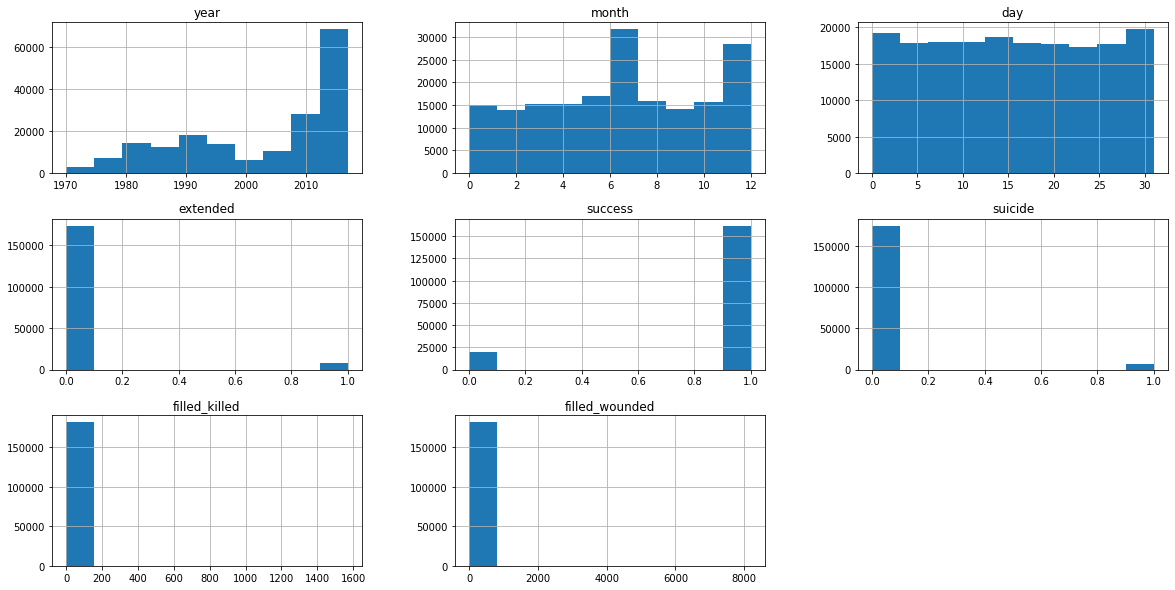

In [ ]:
# Ploting a Histogram for numeric variables to get an understanding of the distribution.
df.hist(figsize=(20,10)) 

**There are 3 columns(extended, success, suicide) that have a bernoulli distribution**.

**Column year is skewed towards the left.This indicates that a lot of data is present from the year 2010.**

**Column month is evenly distributed.**

**Column month has a lot of data for month July and December.**

**Column filled_killed has a lot of data between 0 and 200, meaning for most of the attacks, deaths were between 0 and 200.**

**Column filled_wounded has a lot of data between 0 and 1000, meaning for most of the attacks, wounded were between 0 and 1000.**





### Let's check how intimate the variables are against other variables.

In [ ]:
# This can be done by ploting a correlation heat map.
corr = df.corr()

<Figure size 1440x720 with 0 Axes>

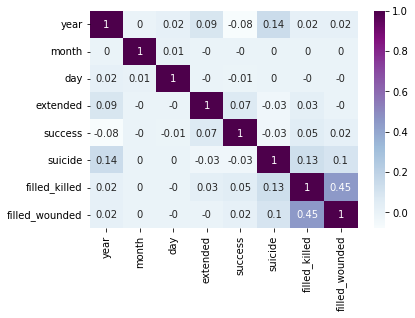

<Figure size 1440x720 with 0 Axes>

In [ ]:
# Ploting the correlation in the form of a heatmap.
sns.heatmap(np.round(corr,2), annot = True,cmap = 'BuPu') 
plt.figure(figsize=(20,10))

**From the above heatmap we can conclude that variables filled_killed and filled_wounded are tad related to eachother as their correlation coeffient is 0.45**.

**Correlation analysis is usually done to see what variables are closely related to eachother and in data cleaning case, dropping those variables that are closely related with eachother**.

Understanding the relationship using the scatter plot.

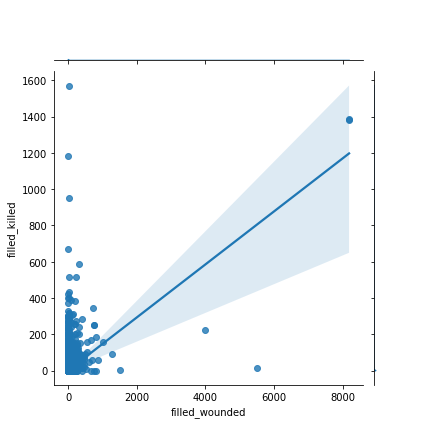

In [ ]:
sns.jointplot(x = 'filled_wounded', y = 'filled_killed', data = df,kind = 'reg')

**We can see that the relation between wounded and killed is a positively correlated one, meaning with the increase in wounds the kills also increase**.



### let us see the Five Number Summary(min,max,first quartile,median,thrid quartile) of killed and wounded grouped by countries using a **Box Plot**

In [ ]:
# Total killed and wounded as per the countires.
top_killed_wounded_distribution = df.groupby('country').agg({'filled_killed':'sum','filled_wounded':'sum'}).sort_values(['filled_killed','filled_wounded'],ascending = [False,False]).head(10)

<Figure size 1440x720 with 0 Axes>

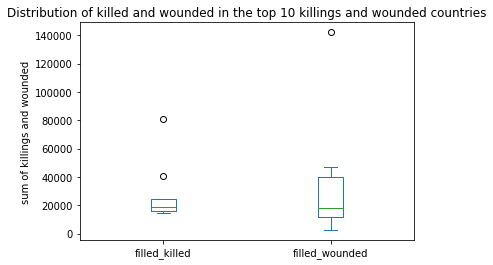

<Figure size 1440x720 with 0 Axes>

In [ ]:
# Ploting a Bar Chart.
top_killed_wounded_distribution.plot(kind = 'box')
plt.title('Distribution of killed and wounded in the top 10 killings and wounded countries')
plt.ylabel('sum of killings and wounded')
plt.figure(figsize=(20,10))

**The median for both the killed and wounded are the same and the remaining(min, max, quatile 1, qautile 3)
are diffrent and also the filled_killed column has 2 outliers but the filled_wounded has only one outlier.**

**The one outlier in the filled_wounded colum is far from the median of filled_wounded column whereas the outliers of the filled_killed column are relatively much closer to the median of the filled_killed.**

### The most successful terroist organisations. 

My Hypotesis - The most successful terrorist organisation is **Taliban.** 

In [ ]:
# Subsetting the data so that there are no unknown values and also find out the most successful terroist organisations.
no_unknown_organisations = df[df['organisation'] != 'Unknown']
most_succesful_organisations = no_unknown_organisations.groupby('organisation').agg({'success':'sum'}).rename(columns = {'success':'succesful attacks'}).sort_values('succesful attacks', ascending = False).head(5)

In [ ]:
most_succesful_organisations

,succesful attacks
organisation,
Taliban,6680
Islamic State of Iraq and the Levant (ISIL),4759
Shining Path (SL),4337
Farabundo Marti National Liberation Front (FMLN),3317
Al-Shabaab,3016


In [ ]:
# The input data for a pie chart must be an array.
data = np.array([6680,4759,4337,3317,3016])
terror_org = np.array(['Taliban','Islamic State of Iraq and the Levant (ISIL)','Shining Path (SL)','Farabundo Marti National Liberation Front (FMLN)',
                   'Al-Shabaab'])
myexplode = [0.2,0,0,0,0]

([<matplotlib.patches.Wedge at 0x7ff38ba50250>,
 [Text(0.7570348636056958, 1.0568340528604792, 'Taliban'),
  Text(-0.9278903735168371, 0.590778685071478, 'Islamic State of Iraq and the Levant (ISIL)'),
  Text(-0.8229550320745564, -0.7298938382964786, 'Shining Path (SL)'),
  Text(0.2639768800951863, -1.0678558923259316, 'Farabundo Marti National Liberation Front (FMLN)'),
  Text(1.0005214389119115, -0.4571179828858612, 'Al-Shabaab')])

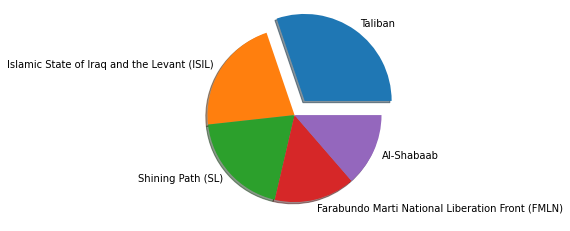

In [ ]:
# Ploting a Pie chart.
plt.pie(data, labels = terror_org, explode = myexplode, shadow = True)

**My Hypotesis is True!**

**Taliban is the most successful organisation, but ISIL is not far behind.**

### In which year the most, and least number of attacks took place.

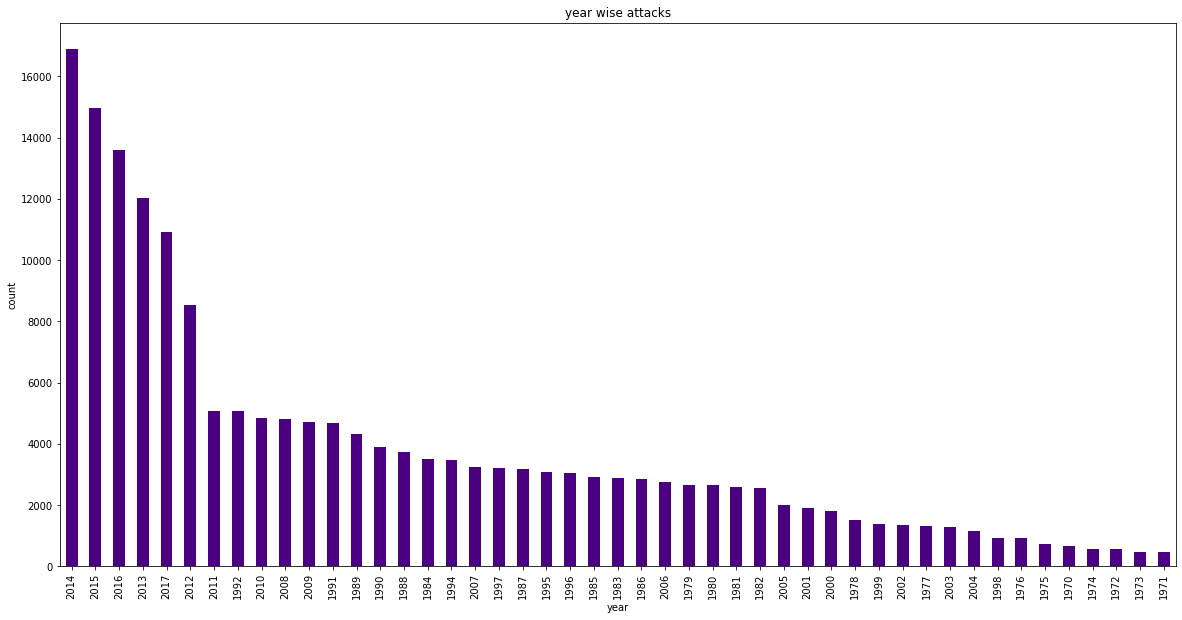

In [ ]:
# Ploting a bar chart 
attacks_year_wise = df['year'].value_counts()
attacks_year_wise.plot(kind = 'bar',color = 'Indigo')
plt.title('year wise attacks')
plt.xlabel('year')
plt.ylabel('count')
plt.rcParams['figure.figsize'] = (25,10)

 **The most,and least number of attacks took place in the year 2014 & 1971 respectively.**


### Understanding the relationship between attacks and years of month.

My Hypotesis - Attacks will take place usually in the festive season.

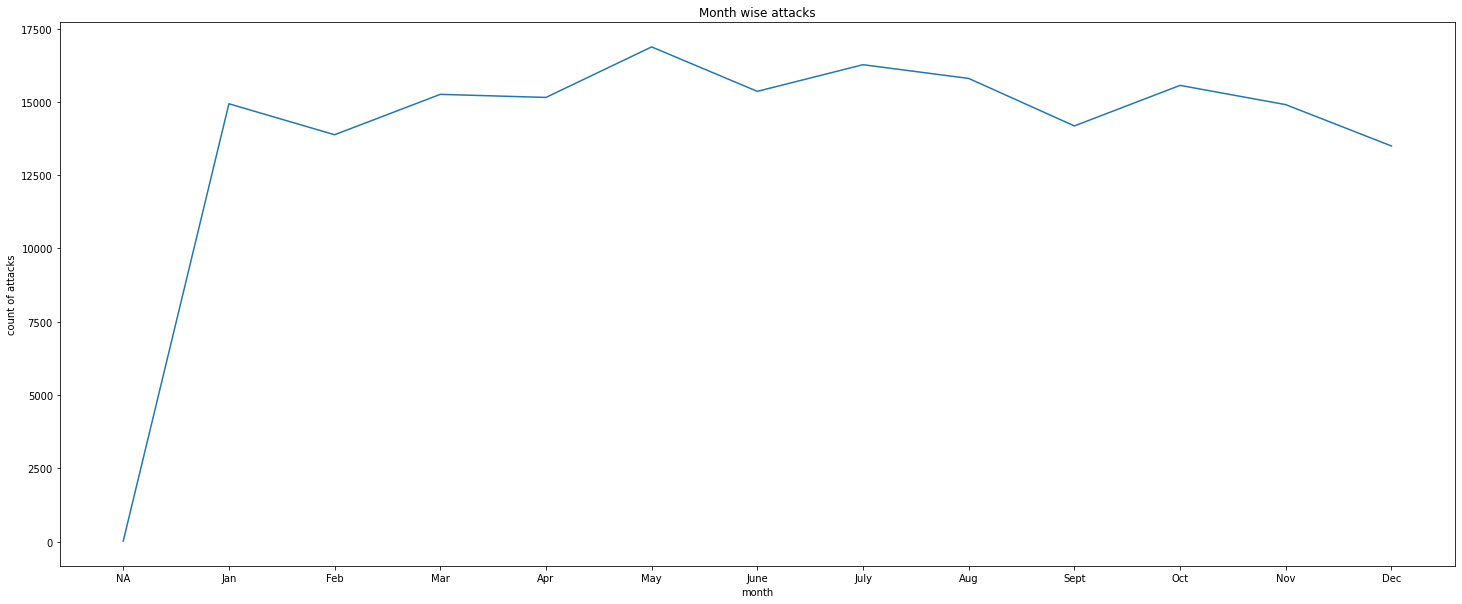

In [ ]:
# Plotting a line graph to check if my hypotesis is true or false.
df.groupby('month')['day'].count().plot()
x = [0,1,2,3,4,5,6,7,8,9,10,11,12]
labels = ['NA','Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']
plt.xticks(x, labels)                 # Using the ticks function to rename x-axis values as months from numbers
plt.ylabel('count of attacks')
plt.title('Month wise attacks')
plt.rcParams['figure.figsize'] = (10, 5)

**From the above line graph we can say that my hypothesis is false. The number of attacks are constant through out the year.**

Here NA represents the number of attacks for which the month in the dataset is not mentioned.

### Terrorist Attacks by Region

My Hypotesis - Middle East and North Africa region probably might have the most number of terror attacks.

Text(0, 0.5, 'Number of Attacks')

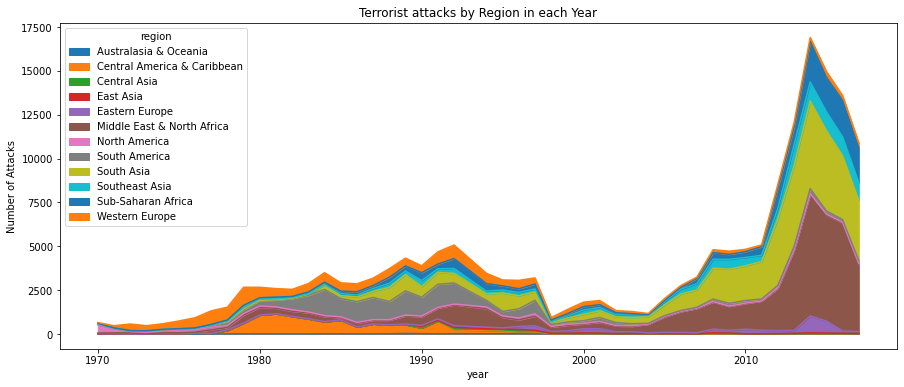

In [ ]:
# Plotting terror attacks as per the region
pd.crosstab(df.year, df.region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist attacks by Region in each Year')
plt.ylabel('Number of Attacks')

### In which country the most number of attacks has taken place.

**Yayy!! my Hypotesis is sort of true**.

**From the above area chart/graph we can see that middle east and north africa has the most number of terror attacks**.


My Hypotesis - It must be Syria(I hear all the time in the news regarding the terror attacks that took place in syria).

In [ ]:
# Top 10 most terrorized countries
most_terrorized_country = df.groupby('country',as_index = True).agg({'day':'count'}).rename(columns = {'day':'no of attacks'}).sort_values('no of attacks',ascending = False).head(10)

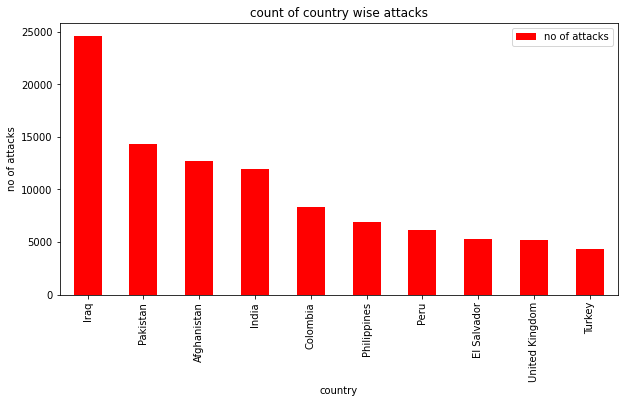

In [ ]:
# Ploting a bar chart
most_terrorized_country.plot(kind = 'bar', color = 'red')
plt.title('count of country wise attacks')
plt.xlabel('country')
plt.ylabel('no of attacks')
plt.rcParams['figure.figsize'] = (10, 20)

**My hypotesis is wrong again, Iraq is the most terrorized country.**

### The total number of attacks in each country using **Plotly**.

In [ ]:
# Creating a dataframe which returns the total terror attacks for each country to use it as colour bar.
total_terror_attacks = df.groupby('country', as_index = False).count()

In [ ]:
# Creating a plot using plotly.
fig=px.choropleth(total_terror_attacks,locations='country',locationmode='country names',
                  color='day',hover_name='country',projection='natural earth',
                  title='Total number of attacks',labels={'day':'Scale of attacks Attacks'})
fig.show()

## In-Deapth analysis of Terorrism in Iraq, the country with the most number of attacks, and Terrorism in India.

In [ ]:
# Subsetting the dataframe with Iraq and India as countries.
iraq_df = df[df['country'] == 'Iraq']
india_df = df[df['country'] == 'India']

### Top Cities with the most number of attacks in both nations.

My Hypothesis - Srinager city is the most jeopardized in India.

In [ ]:
# Subseting a dataframe without city values being equal to Unknown.
india_city_no_unknown = df[(df['country'] == 'India') & (df['city'] != 'Unknown')]
iraq_city_no_unknown = df[(df['country'] == 'Iraq') & (df['city'] != 'Unknown')]

In [ ]:
india_city_no_unknown.head()

,year,month,day,extended,country,region,city,success,suicide,attack_type,target,organisation,motive,weapon_type,filled_killed,filled_wounded
1186,1972,2,22,0,India,South Asia,New Delhi,1,0,Hijacking,Airports & Aircraft,Palestinians,Unknown,Explosives,0.0,0.0
2764,1975,1,2,0,India,South Asia,Samastipur,1,0,Bombing/Explosion,Government (General),Ananda Marga,Unknown,Explosives,4.0,0.0
3857,1976,5,26,0,India,South Asia,New Delhi,1,0,Bombing/Explosion,Airports & Aircraft,Unknown,Unknown,Explosives,0.0,0.0
5327,1977,9,28,0,India,South Asia,Bombay,1,0,Hijacking,Airports & Aircraft,Japanese Red Army (JRA),Unknown,Firearms,0.0,0.0
7342,1979,1,14,0,India,South Asia,Imphal,1,0,Assassination,Government (General),Unknown,Unknown,Firearms,3.0,0.0


In [ ]:
iraq_city_no_unknown.head()

,year,month,day,extended,country,region,city,success,suicide,attack_type,target,organisation,motive,weapon_type,filled_killed,filled_wounded
2854,1975,3,1,0,Iraq,Middle East & North Africa,Mosul,1,0,Hijacking,Airports & Aircraft,Unknown,Unknown,Unknown,0.0,1.0
4385,1976,12,15,0,Iraq,Middle East & North Africa,Baghdad,1,0,Bombing/Explosion,Airports & Aircraft,Unknown,Unknown,Explosives,10.0,285.0
4393,1976,12,18,1,Iraq,Middle East & North Africa,Penjwon,1,0,Hostage Taking (Kidnapping),Government (General),Kurdish Democratic Party-Iraq (KDP),Unknown,Unknown,0.0,0.0
4402,1976,12,24,0,Iraq,Middle East & North Africa,Baghdad,1,0,Assassination,Violent Political Party,Unknown,Unknown,Firearms,2.0,0.0
8688,1979,6,15,0,Iraq,Middle East & North Africa,Basra,1,0,Assassination,Government (General),Unknown,Unknown,Unknown,1.0,0.0


In [ ]:
# Top 5 Iraq and India cities that were attacked the most.
iraq_top_targetted_cities = iraq_city_no_unknown.groupby('city').agg({'day':'count'}).rename(columns = {'day':'attacks'}).sort_values('attacks',ascending = False).head(5)
india_top_targetted_cities = india_city_no_unknown.groupby('city').agg({'day':'count'}).rename(columns = {'day':'attacks'}).sort_values('attacks',ascending = False).head(5)

In [ ]:
# Concatenating both the dataframes so that I can make an easy comparison among those two countries.
india_iraq_df = pd.concat([india_top_targetted_cities,iraq_top_targetted_cities],axis = 1)

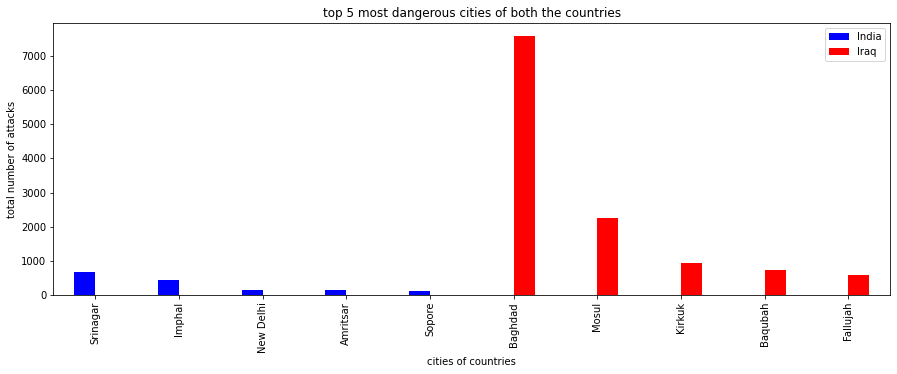

In [ ]:
# Ploting them in a Basic Bar Graph.
india_iraq_df.plot(kind = 'bar',color = ['Blue','Red'])
plt.legend(['India','Iraq'])
plt.title('top 5 most dangerous cities of both the countries')
plt.xlabel('cities of countries')
plt.ylabel('total number of attacks')
plt.rcParams['figure.figsize'] = (10,10)

**My Hypothesis is True**.

**The amount of threat faced by Iraq is way more than the threat faced by india**.

**All the top 5 cities in Iraq face more threat than all the top 5 cities in India**.

**From this analysis we can safely conclude that India counters terror better than Iraq**.

### The type of attack that took place.

In [ ]:
india_df.head()

,year,month,day,extended,country,region,city,success,suicide,attack_type,target,organisation,motive,weapon_type,filled_killed,filled_wounded
1186,1972,2,22,0,India,South Asia,New Delhi,1,0,Hijacking,Airports & Aircraft,Palestinians,Unknown,Explosives,0.000000,0.000000
2764,1975,1,2,0,India,South Asia,Samastipur,1,0,Bombing/Explosion,Government (General),Ananda Marga,Unknown,Explosives,4.000000,0.000000
3857,1976,5,26,0,India,South Asia,New Delhi,1,0,Bombing/Explosion,Airports & Aircraft,Unknown,Unknown,Explosives,0.000000,0.000000
5327,1977,9,28,0,India,South Asia,Bombay,1,0,Hijacking,Airports & Aircraft,Japanese Red Army (JRA),Unknown,Firearms,0.000000,0.000000
7337,1979,1,13,0,India,South Asia,Unknown,1,0,Armed Assault,Police,Naga People,Unknown,Firearms,1.647445,2.518686


In [ ]:
# Code for finding out the most common attack type used.
india_attack_type = india_df.groupby('attack_type').agg({'day':'count'}).rename(columns = {'day':'count of attack type'}).sort_values('count of attack type',ascending = False).head(3)
iraq_attack_type = iraq_df.groupby('attack_type').agg({'day':'count'}).rename(columns = {'day':'count of attack type'}).sort_values('count of attack type',ascending = False).head(3)

In [ ]:
# Concatenating both countries attack types.
india_iraq_attack_type = pd.concat([india_attack_type,iraq_attack_type], axis = 1)

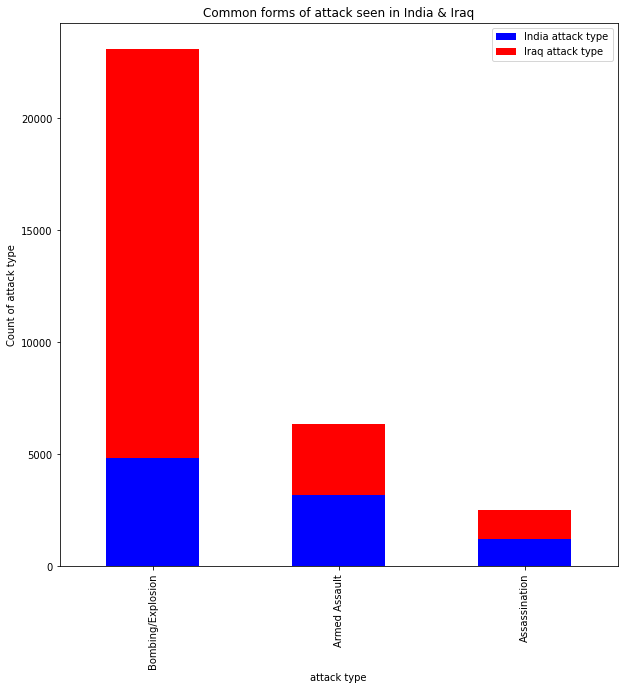

In [ ]:
# Stacked Bar Plot.
india_iraq_attack_type.plot(kind = 'bar', stacked = True, color = ['Blue','Red'])
plt.legend(['India attack type','Iraq attack type'])
plt.title('Common forms of attack seen in India & Iraq')
plt.xlabel('attack type')
plt.ylabel('Count of attack type')
plt.rcParams['figure.figsize'] = (10,15)

**Bombing/Explosion is used the most in both the countries as a form attack**.

**Armed Assault and Assassination is equally being used as a form of attack in both the nations**.

### Name the top Terror organisations and what they target the most in both the countries.


In [ ]:
# Subsetting the dataset without the Unknown values.
india_no_na_org = india_df[india_df['organisation'] != 'Unknown']
iraq_no_na_org = iraq_df[iraq_df['organisation'] != 'Unknown']

In [ ]:
# Creating a dataframe to get the top terror organisations targets.
iraq_target = iraq_no_na_org.groupby(['organisation','target'],as_index = True).agg({'day':'count'}).rename(columns = {'day':'times targeted'}).sort_values('times targeted', ascending = False).head(5)
india_target = india_no_na_org.groupby(['organisation','target'], as_index = True).agg({'day':'count'}).rename(columns = {'day':'times targeted'}).sort_values('times targeted', ascending = False).head(5)

In [ ]:
# Concatenating both the dataframes
india_iraq_target = pd.concat([india_target,iraq_target],axis = 1)

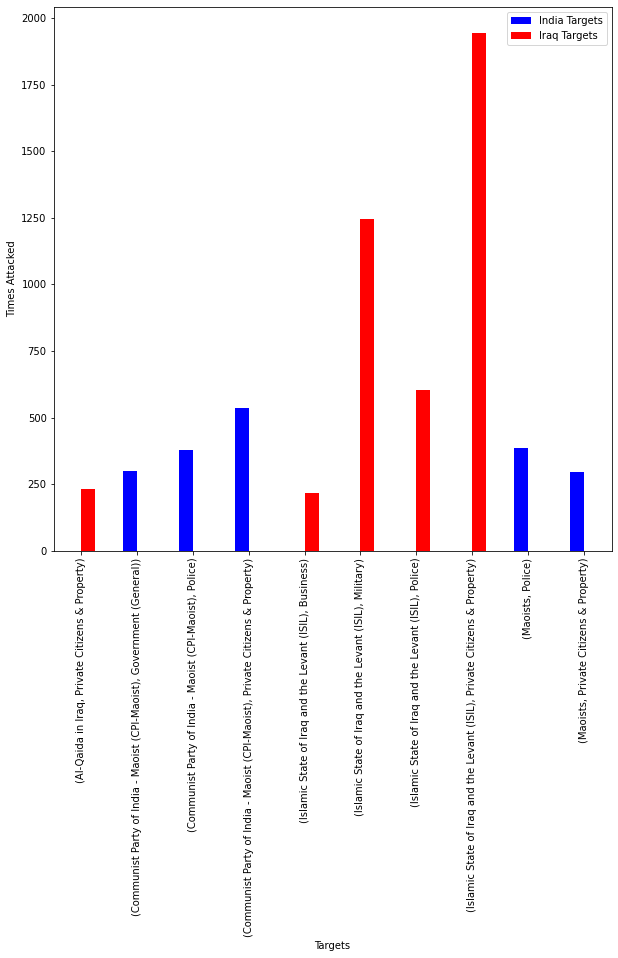

In [ ]:
# Ploting a Graph.
india_iraq_target.plot(kind = 'bar', color = ['Blue','Red'])
plt.legend(['India Targets','Iraq Targets'])
plt.xlabel('Targets')
plt.ylabel('Times Attacked')
plt.rcParams['figure.figsize'] = (5,10)

**The main diffrence between India and Iraq is -**

**The top terror organisation in india is CPI-Maoist,Maoists and they target Citizens,Police**.


**In Iraq, the top terror organisations are-**
**Al-Qaida - targets citizens**
**ISIL - targets Citizens, Military the most**.

# **Insights derived from analysing the data**.

* Killed and Wounded are the only 2 features that have some form of influence among each other and the relationship is a positive one.

* The medians of killed and wounded are approximately the same, but the First Quartile, Third Quartile, Minimum and Maximum differ for both.

* Taliban is the most successful terrorist organisation.

* The most,least number of attacks took place in the year 2014,1971 respectively.

* Terrorist attacks take place throughout all the months of a year.

* The most attacked region is middle-east and north africa.

* A large portion of terror attacks took place in Iraq.

* *Conclusions from analysing Indian terrorism and Iraq Terrorism-*
    1. *All the cities in India counter terrorism better than all the cities in Iraq.*
    2. *The forms of attacks used in both the countries is similar.*
    3. *In India,The top terror organisation CPI-Maoist,Maoists they target Citizens,Police*
  *whereas in Iraq Al-Qaida,ISIL terror organizations target the Citizens,Military the most.*